### Data Source
##### Sloan Digital Sky Survey DR14: Classification of Stars, Galaxies and Quasar: 
##### https://www.kaggle.com/lucidlenn/sloan-digital-sky-survey

##### Description
10,000 observations of space taken by the Sloan Digital Sky Survey (SDSS). 17 feature and 1 class column (identifying observation as a star, galaxy or quasar)

##### Variables/Columns
 objid = Object Identifier (PhotoObj table) [unique-drop]<br>
 ra = Right Ascension (PhotoObj table) [numerical]<br>
 dec = Declination (PhotoObj table) [numerical]<br>
 u, g, r, i, z = 5 bands of the telescope (per the Gunn-Thuan griz astronomical magnitude system) [numerical]<br>
 run = Run Number identifies the specific scan [categorical-23]<br>
 rerun = specifies how image was processed [unique-drop]<br>
 camcol = Camera Column (1 - 6) identifies scanline w/in the Run [categorical-6]<br>
 field = Field Number ~ starts at 11 (after an init'l rampup time) & can be as large as 800 for longer runs [categorical-703]<br>
 specobjid = Object Identifier [categorical-6349]<br>
 class = Object Class [Classification Labels/categorical-3]<br>
 redshift = Final Redshift [categorical-9637]<br>
 plate = Round AL plates at positions of objects of interest through which holes are drilled to  pass optical fiber [categorical-487]<br>
 mjd = Modified Julian Date (of Observation) [categorical-355]<br>
 fiberid = Optical Fiber ID  [categorical-892]

### Load CSV Data/Dependencies

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import warnings
warnings.simplefilter('ignore')
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

In [2]:
obsrv = pd.read_csv('./data/Skyserver_SQL2_27_2018 6_51_39 PM.csv')

### Review/Clean Data 
re: obsv_model_InitDataAnalysis.ipynb for initial data review.

In [3]:
df1 = pd.DataFrame(obsrv, columns=['ra','dec','u','g','r','i','z','class', 'redshift'])
df2 = pd.DataFrame(obsrv, columns=['u','g','r','i','z','class', 'redshift'])
df3 = pd.DataFrame(obsrv, columns=['redshift','class'])

### KNN Model - DF1
(All features)

In [4]:
# Assign Variables
y = df1["class"]
target_names = ["STAR", "QSO", "GALAXY"]

In [5]:
X = df1.drop("class", axis=1)
X.head()

,ra,dec,u,g,r,i,z,redshift
0,183.531326,0.089693,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,183.598371,0.135285,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055
2,183.680207,0.126185,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111
3,183.870529,0.049911,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111
4,183.883288,0.102557,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590


In [6]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [7]:
print(X_train.shape, y_train.shape,X_test.shape, y_test.shape)

(7000, 8) (7000,) (3000, 8) (3000,)


In [8]:
# from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [9]:
# from sklearn import metrics
y_pred = lr_model.predict(X_test)

In [10]:
metrics.accuracy_score(y_test, y_pred)
print("LR Metric Test/Pred Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

LR Metric Test/Pred Score: 85.03%


In [11]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KN Metric Test/Pred (k-11) Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

KN Metric Test/Pred (k-11) Score: 74.90%


In [12]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KN Metric Test/Pred (k-15) Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

KN Metric Test/Pred (k-15) Score: 73.57%


In [13]:
k_range = range(1, 27)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.7716666666666666, 0.7346666666666667, 0.7713333333333333, 0.7593333333333333, 0.76, 0.752, 0.7533333333333333, 0.751, 0.7546666666666667, 0.7456666666666667, 0.749, 0.7433333333333333, 0.7486666666666667, 0.737, 0.7356666666666667, 0.7323333333333333, 0.7326666666666667, 0.7273333333333334, 0.7263333333333334, 0.725, 0.7226666666666667, 0.7226666666666667, 0.7193333333333334, 0.719, 0.7133333333333334, 0.711]


Text(0, 0.5, 'Testing Accuracy')

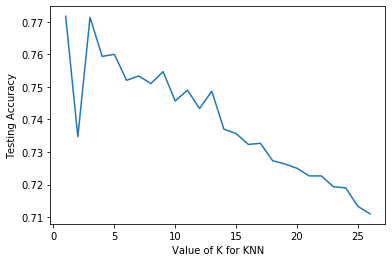

In [14]:
df1_plot = plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [15]:
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [16]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.912
k: 3, Train/Test Score: 0.952/0.900
k: 5, Train/Test Score: 0.933/0.897
k: 7, Train/Test Score: 0.923/0.891
k: 9, Train/Test Score: 0.914/0.886
k: 11, Train/Test Score: 0.908/0.888
k: 13, Train/Test Score: 0.903/0.884
k: 15, Train/Test Score: 0.897/0.877
k: 17, Train/Test Score: 0.894/0.874
k: 19, Train/Test Score: 0.890/0.868


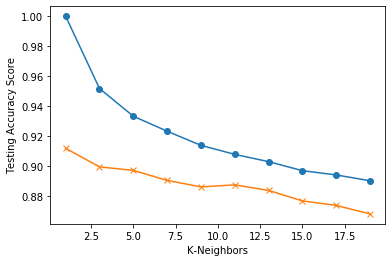

In [17]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K-Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

### KNN Model - DF2
(Astronomical Magnitude and Redshift features)

In [18]:
# Assign Variables
y = df2["class"]
target_names = ["STAR", "QSO", "GALAXY"]

In [19]:
X = df2.drop("class", axis=1)
X.head()

,u,g,r,i,z,redshift
0,19.47406,17.04240,15.94699,15.50342,15.22531,-0.000009
1,18.66280,17.21449,16.67637,16.48922,16.39150,-0.000055
2,19.38298,18.19169,17.47428,17.08732,16.80125,0.123111
3,17.76536,16.60272,16.16116,15.98233,15.90438,-0.000111
4,17.55025,16.26342,16.43869,16.55492,16.61326,0.000590


In [20]:
# from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [21]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 6)
(3000, 6)
(7000,)
(3000,)


In [22]:
# from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [23]:
# from sklearn import metrics
y_pred = lr_model.predict(X_test)

In [24]:
print("LR Metric Test/Pred Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

LR Metric Test/Pred Score: 96.00%


In [25]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KN Metric Test/Pred (k-11) Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

KN Metric Test/Pred (k-11) Score: 93.43%


In [26]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KN Metric Test/Pred (k-15) Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))


KN Metric Test/Pred (k-15) Score: 93.10%


In [27]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.952, 0.9446666666666667, 0.9466666666666667, 0.948, 0.9486666666666667, 0.9493333333333334, 0.941, 0.941, 0.937, 0.937, 0.9343333333333333, 0.9363333333333334, 0.932, 0.9323333333333333, 0.931, 0.9293333333333333, 0.9256666666666666, 0.9266666666666666, 0.9243333333333333, 0.9243333333333333, 0.9226666666666666, 0.9206666666666666, 0.9203333333333333, 0.921, 0.92]


Text(0, 0.5, 'Testing Accuracy')

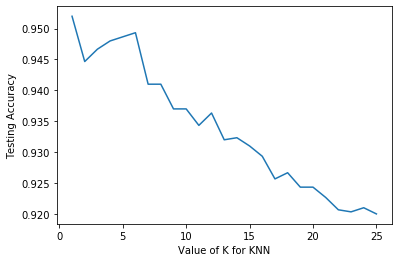

In [28]:
df2_plot = plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [29]:
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [30]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.965
k: 3, Train/Test Score: 0.976/0.960
k: 5, Train/Test Score: 0.967/0.960
k: 7, Train/Test Score: 0.963/0.953
k: 9, Train/Test Score: 0.957/0.953
k: 11, Train/Test Score: 0.953/0.950
k: 13, Train/Test Score: 0.951/0.946
k: 15, Train/Test Score: 0.948/0.943
k: 17, Train/Test Score: 0.946/0.942
k: 19, Train/Test Score: 0.945/0.939


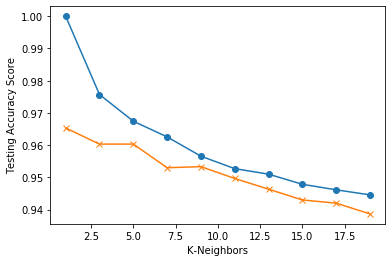

In [31]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K-Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()

### KNN Model - DF3
(Redshift feature)

In [32]:
# Assign Variables
y = df3["class"]
target_names = ["STAR", "QSO", "GALAXY"]

In [33]:
X = df3.drop("class", axis=1)
X.head()

,redshift
0,-0.000009
1,-0.000055
2,0.123111
3,-0.000111
4,0.000590


In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [35]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(7000, 1)
(3000, 1)
(7000,)
(3000,)


In [36]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)

LogisticRegression()

In [37]:
from sklearn import metrics
y_pred = lr_model.predict(X_test)

In [38]:
print("LR Metric Test/Pred Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

LR Metric Test/Pred Score: 93.80%


In [39]:
knn = KNeighborsClassifier(n_neighbors=11)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KN Metric Test/Pred (k-11) Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

KN Metric Test/Pred (k-11) Score: 98.83%


In [40]:
knn = KNeighborsClassifier(n_neighbors=15)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print("KN Metric Test/Pred (k-15) Score: %.2f%%" % (metrics.accuracy_score(y_test, y_pred)*100))

KN Metric Test/Pred (k-15) Score: 98.80%


In [41]:
k_range = range(1, 26)

scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

print(scores)

[0.9806666666666667, 0.9833333333333333, 0.9873333333333333, 0.9876666666666667, 0.9876666666666667, 0.9876666666666667, 0.988, 0.988, 0.988, 0.9883333333333333, 0.9883333333333333, 0.988, 0.988, 0.988, 0.988, 0.9876666666666667, 0.9876666666666667, 0.9873333333333333, 0.9873333333333333, 0.9876666666666667, 0.9876666666666667, 0.9873333333333333, 0.987, 0.9873333333333333, 0.9866666666666667]


Text(0, 0.5, 'Testing Accuracy')

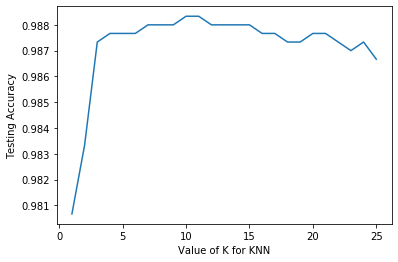

In [42]:
df3_plot = plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [43]:
# from sklearn.preprocessing import StandardScaler
X_scaler = StandardScaler().fit(X_train)

In [44]:
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k: 1, Train/Test Score: 1.000/0.981
k: 3, Train/Test Score: 0.991/0.987
k: 5, Train/Test Score: 0.991/0.988
k: 7, Train/Test Score: 0.990/0.988
k: 9, Train/Test Score: 0.990/0.988
k: 11, Train/Test Score: 0.990/0.988
k: 13, Train/Test Score: 0.990/0.988
k: 15, Train/Test Score: 0.990/0.988
k: 17, Train/Test Score: 0.990/0.988
k: 19, Train/Test Score: 0.990/0.987


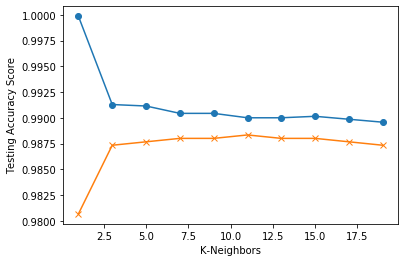

In [45]:
train_scores = []
test_scores = []
for k in range(1, 20, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("K-Neighbors")
plt.ylabel("Testing Accuracy Score")
plt.show()